# Linear Regression 
### Sophia Kramar

Лабораторная работа номер 3
https://moodle.herzen.spb.ru/pluginfile.php/226588/mod_resource/content/7/Lab%203.%20Linear%20regression.html

In [28]:
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


trainSet=pd.read_csv('input/web_traffic.tsv', sep='\t', header = None).dropna() # прочитать и убратать NaN'ы
print(trainSet.shape)
print(pd.DataFrame(trainSet).head(7))

(735, 2)
   0       1
0  1  2272.0
2  3  1386.0
3  4  1365.0
4  5  1488.0
5  6  1337.0
6  7  1883.0
7  8  2283.0


Подключение всех библиотек, загрузка данных в переменные, формирование фреймов

In [29]:
X = trainSet.iloc[:,0] 
Y = trainSet.iloc[:,1]
print(type(X))


<class 'pandas.core.series.Series'>


Выделение фреймов на сеты X и Y

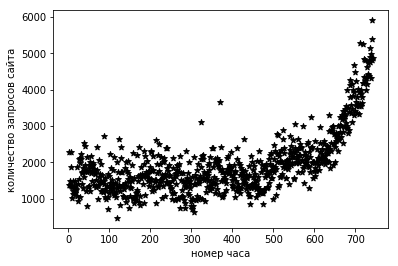

In [30]:
plt.scatter(X, Y, c='black', marker='*')
plt.xlabel('номер часа')
plt.ylabel('количество запросов сайта')
plt.show()

In [31]:
th1_1, th0_1 = sp.polyfit(X, Y, 1)
th2_2, th1_2, th0_2 = np.polyfit(X, Y, 2)
th3_3, th2_3, th1_3, th0_3 = np.polyfit(X, Y, 3)
th4_4, th3_4, th2_4, th1_4, th0_4 = np.polyfit(X, Y, 4)
th5_5, th4_5, th3_5, th2_5, th1_5, th0_5 = np.polyfit(X, Y, 5)

In [32]:
x = [1, len(Y)]
m = list(range(len(Y)))

f1 = sp.poly1d(np.polyfit(X, Y, 1))
f5 = sp.poly1d(np.polyfit(X, Y, 5))

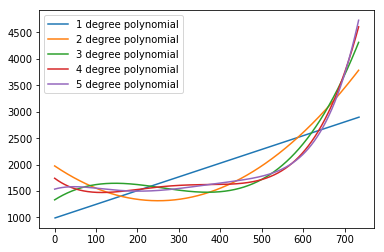

In [33]:
plt.plot(x, f1(x), label='1 degree polynomial')
plt.plot(m, sp.poly1d(np.polyfit(X, Y, 2))(m), label='2 degree polynomial')
plt.plot(m, sp.poly1d(np.polyfit(X, Y, 3))(m), label='3 degree polynomial')
plt.plot(m, sp.poly1d(np.polyfit(X, Y, 4))(m), label='4 degree polynomial')
plt.plot(m, f5(m), label='5 degree polynomial')
plt.legend()

In [34]:
def sq_error(X, Y, f_x=None):
    squared_error = []
    X = X.values
    Y = Y.values
    for i in range(len(Y)):
        squared_error.append((f_x(X[i]) - Y[i])**2)
    return sum(squared_error)

In [35]:
fy1 = lambda x: th1_1*x + th0_1
fy2 = lambda x: th2_2*x**2 + th1_2*x + th0_2
fy3 = lambda x: th3_3*x**3 + th2_3*x**2 + th1_3*x + th0_3
fy4 = lambda x: th4_4*x**4 + th3_4*x**3 + th2_4*x**2 + th1_4*x + th0_4
fy5 = lambda x: th5_5*x**5 + th4_5*x**4 + th3_5*x**3 + th2_5*x**2 + th1_5*x + th0_5

sqerr1 = sq_error(X, Y, fy1)
sqerr2 = sq_error(X, Y, fy2)
sqerr3 = sq_error(X, Y, fy3)
sqerr4 = sq_error(X, Y, fy4)
sqerr5 = sq_error(X, Y, fy5)

In [36]:
print(f"1) CKO = {sqerr1:.2f}, первая степень")
print(f"2) CKO = {sqerr2:.2f}, на {100 - 100*sqerr2/sqerr1:.2f}% ближе")
print(f"3) CKO = {sqerr3:.2f}, на {100 - 100*sqerr3/sqerr1:.2f}% ближе")
print(f"4) CKO = {sqerr4:.2f}, на {100 - 100*sqerr4/sqerr1:.2f}% ближе")
print(f"5) CKO = {sqerr5:.2f}, на {100 - 100*sqerr5/sqerr1:.2f}% ближе")

1) CKO = 317389767.34, первая степень
2) CKO = 179983507.88, на 43.29% ближе
3) CKO = 139350144.03, на 56.09% ближе
4) CKO = 126972023.68, на 59.99% ближе
5) CKO = 124464714.57, на 60.78% ближе


In [37]:
model = LinearRegression()
X = X.values.reshape(-1, 1)
Y = Y.values.reshape(-1, 1)
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

10. Предсказание значения целевого параметра для x = list(range(744, 751))
Полином 1-ой степени: 989.025x + 2.596
Полином 5-ой степени: -1.4855973472127424e-13x^5 + 5.548548750085388e-10x^4 -0.0000008x^3 + 0.0006192x^2 + 2.36x + 1023.57


/Users/vonkuptschino/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys


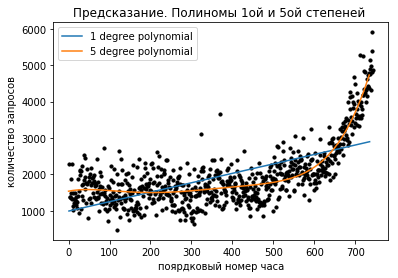

In [45]:
x10_predict = np.array(list(range(744, 751)))
vectorx10_predict = x10_predict.reshape(-1, 1)
y10_predict = model.predict(vectorx10_predict).flatten()

print("10. Предсказание значения целевого параметра для x = list(range(744, 751))")
th1_1_10, th0_1_10 = sp.polyfit(x10_predict, y10_predict, 1)
th5_2_10, th4_2_10, th3_2_10, th2_2_10, th1_2_10, th0_2_10 = np.polyfit(x10_predict, y10_predict, 5)
print(f"Полином 1-ой степени: {th0_1_10:.3f}x + {th1_1_10:.3f}")
print(f"Полином 5-ой степени: {th5_2_10}x^5 + {th4_2_10}x^4 {th3_2_10:.7f}x^3 + {th2_2_10:.7f}x^2 + {th1_2_10:.2f}x + {th0_2_10:.2f}")



plt.title('Предсказание. Полиномы 1ой и 5ой степеней ')
plt.scatter(X, Y, c='black', s=10)
plt.plot(x, f1(x), label='1 degree polynomial')
plt.plot(m, f5(m), label='5 degree polynomial')
plt.ylabel('количество запросов')
plt.xlabel('поярдковый номер часа')
plt.legend()
plt.show()

